## Quick test for the cloud module dropsonde files

Test output of ```p3cld_product_dropsnds.py```.

In [48]:
import os

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

All cloud module dropsonde filenames

In [49]:
dir_drpsnds = "./cldmod_datafiles/"
fnames = [f for f in os.listdir(dir_drpsnds) 
          if f.startswith("p3cld_dropsondes") and f.endswith(".nc") 
         ]

Print contents of first file

In [50]:
f = fnames[0]
data = xr.load_dataset(dir_drpsnds + f)
print(data)

<xarray.Dataset>
Dimensions:          (alt: 1001, nv: 2, sounding: 2)
Coordinates:
  * alt              (alt) int32 0 10 20 30 40 50 ... 9960 9970 9980 9990 10000
  * sounding         (sounding) int32 821 822
    launch_time      (sounding) datetime64[ns] 2020-01-17T17:25:20 2020-01-17...
    lat              (sounding, alt) float32 nan 15.36 15.36 ... nan nan nan
    lon              (sounding, alt) float32 nan -50.01 -50.01 ... nan nan nan
Dimensions without coordinates: nv
Data variables:
    alt_bnds         (alt, nv, sounding) float64 -5.0 -5.0 ... 1.000e+04
    low_height_flag  (sounding) float64 1.0 1.0
    p                (sounding, alt) float32 nan 1.015e+05 1.014e+05 ... nan nan
    ta               (sounding, alt) float32 nan 298.3 298.2 ... nan nan nan
    rh               (sounding, alt) float32 nan 0.7605 0.7591 ... nan nan nan
    wspd             (sounding, alt) float32 nan 6.399 6.514 ... nan nan nan
    wdir             (sounding, alt) float32 nan 75.87 75.25 ... nan

In [51]:
print(data)

<xarray.Dataset>
Dimensions:          (alt: 1001, nv: 2, sounding: 2)
Coordinates:
  * alt              (alt) int32 0 10 20 30 40 50 ... 9960 9970 9980 9990 10000
  * sounding         (sounding) int32 821 822
    launch_time      (sounding) datetime64[ns] 2020-01-17T17:25:20 2020-01-17...
    lat              (sounding, alt) float32 nan 15.36 15.36 ... nan nan nan
    lon              (sounding, alt) float32 nan -50.01 -50.01 ... nan nan nan
Dimensions without coordinates: nv
Data variables:
    alt_bnds         (alt, nv, sounding) float64 -5.0 -5.0 ... 1.000e+04
    low_height_flag  (sounding) float64 1.0 1.0
    p                (sounding, alt) float32 nan 1.015e+05 1.014e+05 ... nan nan
    ta               (sounding, alt) float32 nan 298.3 298.2 ... nan nan nan
    rh               (sounding, alt) float32 nan 0.7605 0.7591 ... nan nan nan
    wspd             (sounding, alt) float32 nan 6.399 6.514 ... nan nan nan
    wdir             (sounding, alt) float32 nan 75.87 75.25 ... nan

Plot all dropsondes

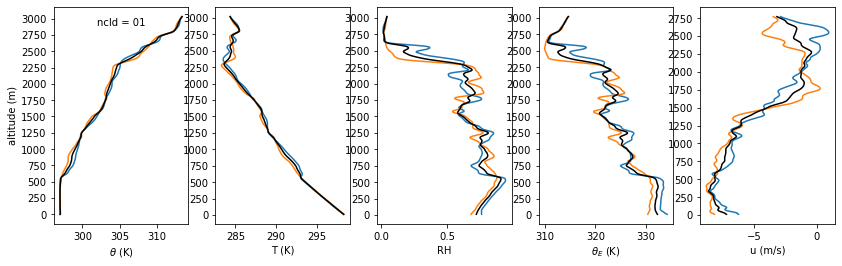

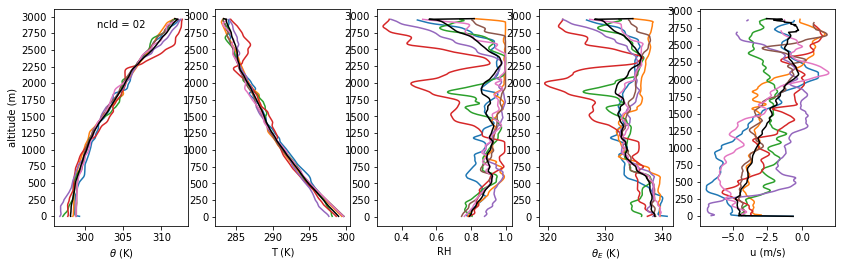

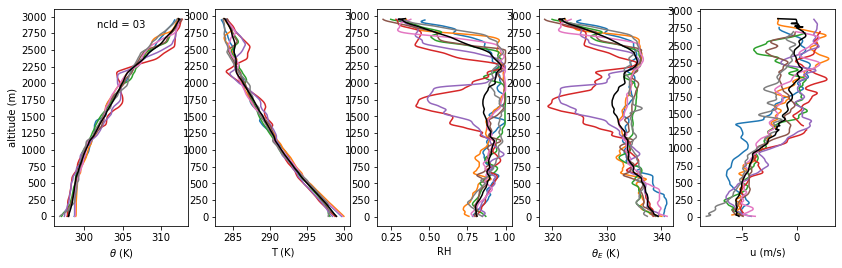

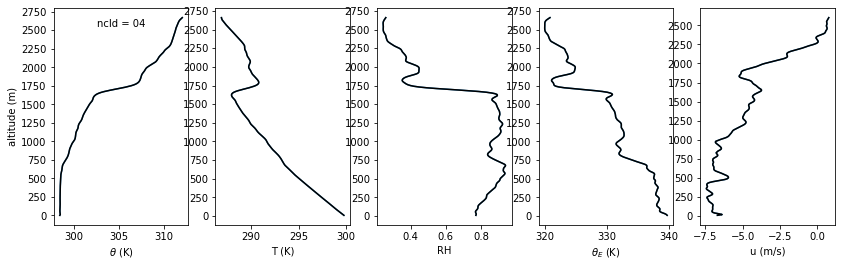

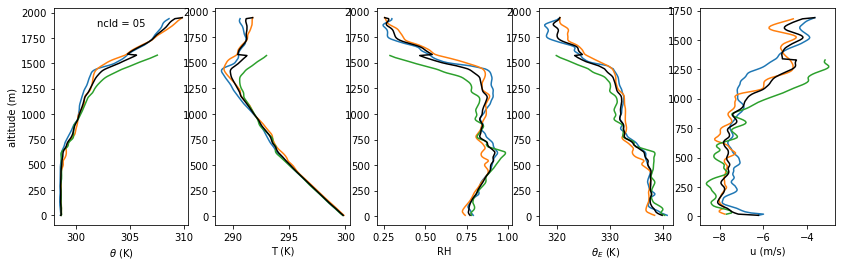

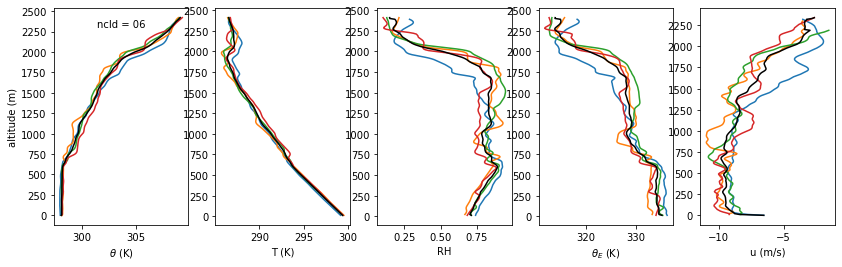

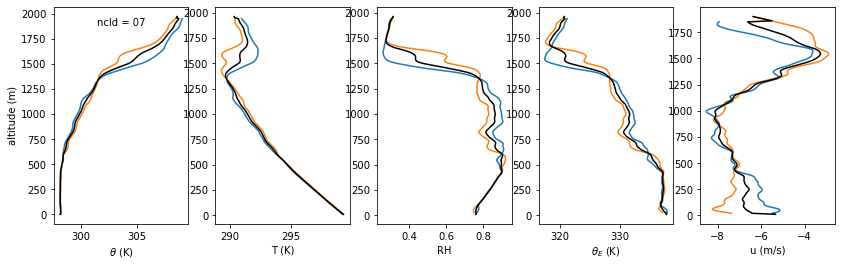

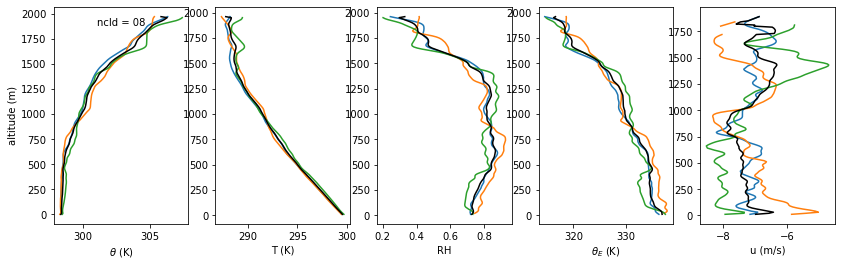

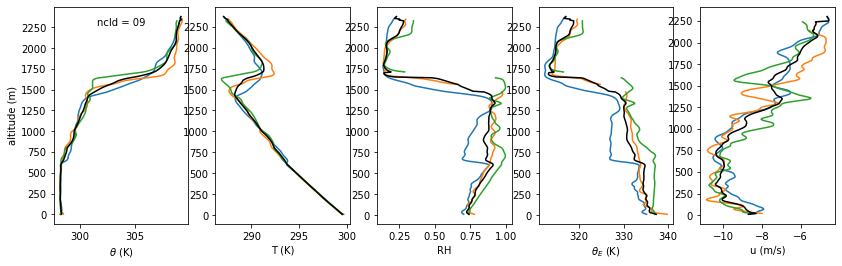

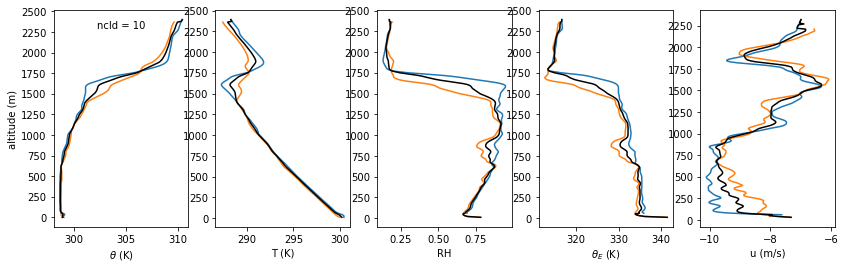

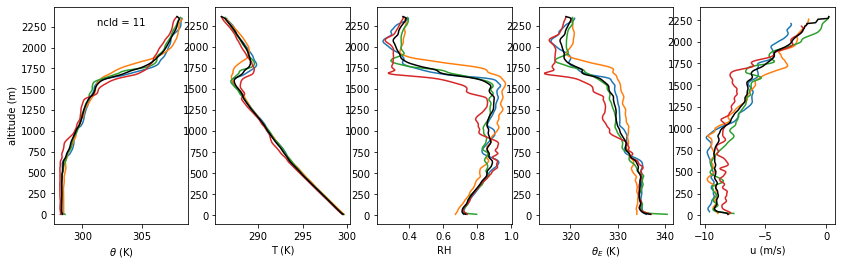

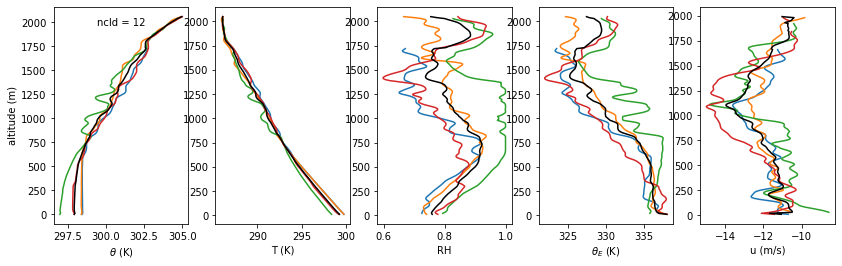

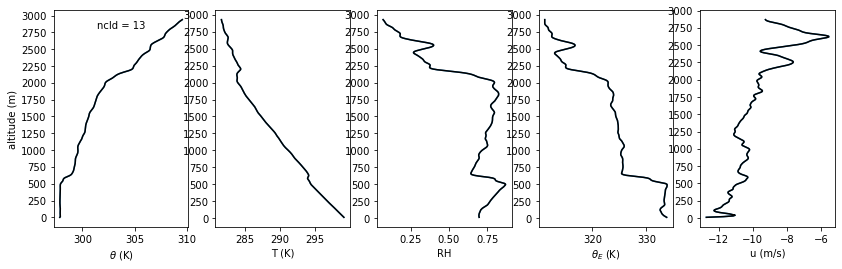

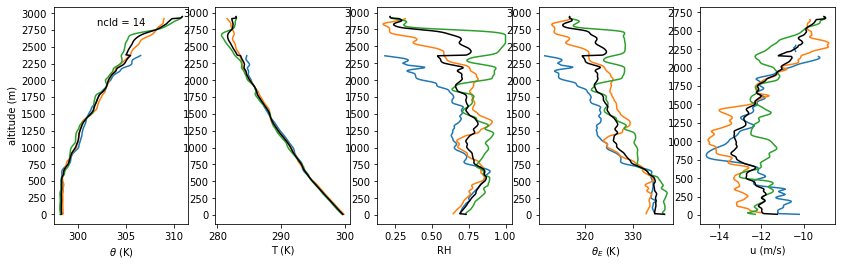

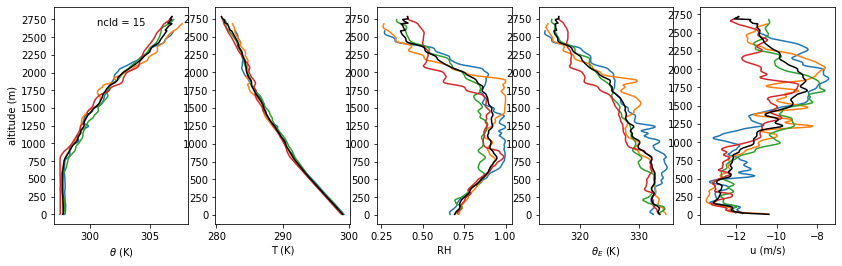

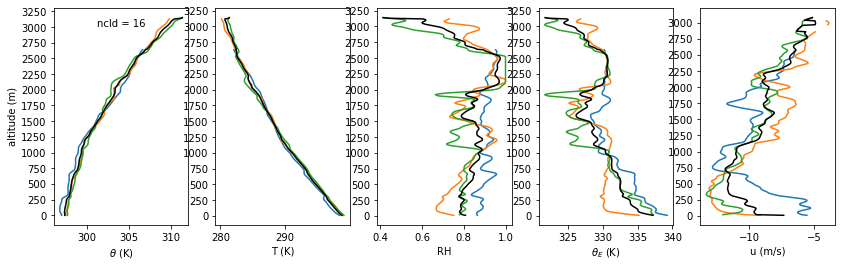

In [65]:
varplotkeys = ['theta', 'ta', 'rh', 'thetaE', 'u']

for f in fnames:
    data = xr.load_dataset(dir_drpsnds + f)
    

    fig, axes = plt.subplots(1, 5, figsize=(14,4))
    
    for nsonde in data['sounding'].values:
            
        data_sonde = data.sel(sounding=nsonde)
    
        for varkey, ax in zip(varplotkeys, axes):
            ax.plot(data_sonde[varkey], data_sonde['alt'])
            ax.set_yticks(np.arange(0, 3251, 250))
            
    axes[0].set_xlabel(r"$\theta$ (K)")
    axes[1].set_xlabel(r"T (K)")
    axes[2].set_xlabel(r"RH")
    axes[3].set_xlabel(r"$\theta_E$ (K)")
    axes[4].set_xlabel("u (m/s)")
    axes[0].set_ylabel(r"altitude (m)")
    
    ncld = f[f.index('_ncld')+5: f.index('_ncld')+7]
    axes[0].text(0.5, 0.95, "ncld = %s" % ncld,
                ha='center', va='top', transform=axes[0].transAxes
                )
    
    # Mean profiles:
    meanprfs = data.mean(dim='sounding')
    for varkey, ax in zip(varplotkeys, axes):
        ax.plot(meanprfs[varkey], meanprfs['alt'], c='black')

In [57]:
fnames

['p3cld_dropsondes_20200117_ncld01.nc',
 'p3cld_dropsondes_20200124_ncld02.nc',
 'p3cld_dropsondes_20200124_ncld03.nc',
 'p3cld_dropsondes_20200131_ncld04.nc',
 'p3cld_dropsondes_20200131_ncld05.nc',
 'p3cld_dropsondes_20200204_ncld06.nc',
 'p3cld_dropsondes_20200204_ncld07.nc',
 'p3cld_dropsondes_20200204_ncld08.nc',
 'p3cld_dropsondes_20200205_ncld09.nc',
 'p3cld_dropsondes_20200205_ncld10.nc',
 'p3cld_dropsondes_20200205_ncld11.nc',
 'p3cld_dropsondes_20200209_ncld12.nc',
 'p3cld_dropsondes_20200209_ncld13.nc',
 'p3cld_dropsondes_20200210_ncld14.nc',
 'p3cld_dropsondes_20200210_ncld15.nc',
 'p3cld_dropsondes_20200211_ncld16.nc']

In [58]:
f =  'p3cld_dropsondes_20200204_ncld08.nc'
data = xr.load_dataset(dir_drpsnds + f)

In [59]:
data

<xarray.Dataset>
Dimensions:          (alt: 1001, nv: 2, sounding: 4)
Coordinates:
  * alt              (alt) int32 0 10 20 30 40 50 ... 9960 9970 9980 9990 10000
  * sounding         (sounding) int32 950 951 952 953
    launch_time      (sounding) datetime64[ns] 2020-02-04T20:35:12 ... 2020-0...
    lat              (sounding, alt) float32 nan 13.24 13.24 ... nan nan nan
    lon              (sounding, alt) float32 nan -55.89 -55.89 ... nan nan nan
Dimensions without coordinates: nv
Data variables:
    alt_bnds         (alt, nv, sounding) float64 -5.0 -5.0 ... 1.000e+04
    low_height_flag  (sounding) float64 1.0 1.0 1.0 1.0
    p                (sounding, alt) float32 nan 1.014e+05 1.013e+05 ... nan nan
    ta               (sounding, alt) float32 nan 299.6 299.5 ... nan nan nan
    rh               (sounding, alt) float32 nan 0.6796 0.6836 ... nan nan nan
    wspd             (sounding, alt) float32 nan 8.864 8.918 ... nan nan nan
    wdir             (sounding, alt) float32 nan 56.19 54.49 ... nan nan nan
    u                (sounding, alt) float32 nan -7.365 -7.26 ... nan nan nan
    v                (sounding, alt) float32 nan -4.931 -5.18 ... nan nan nan
    theta            (sounding, alt) float32 298.3 298.4 298.4 ... nan nan nan
    q                (sounding, alt) float32 0.01467 0.01469 0.01471 ... nan nan
    PW               (sounding) float32 25.28 24.54 25.34 24.22
    platform         (sounding) object 'P3' 'P3' 'P3' 'P3'
    flight_height    (sounding) float32 2.037e+03 2.03e+03 2.028e+03 2.016e+03
    flight_lat       (sounding) float32 13.25 13.25 13.25 13.25
    flight_lon       (sounding) float32 -55.87 -55.52 -55.22 -54.91
    sonde_id         (sounding) object 'P3-0204_s28' ... 'P3-0204_s31'
    N_ptu            (sounding, alt) float32 1.0 2.0 2.0 2.0 ... nan nan nan nan
    N_gps            (sounding, alt) float32 0.0 2.0 2.0 2.0 ... nan nan nan nan
    thetav           (sounding, alt) float32 nan 301.0 301.0 ... nan nan nan
    thetaE           (sounding, alt) float32 nan 334.4 334.4 ... nan nan nan
    z_mltop          (sounding) float64 640.0 650.0 780.0 580.0
    z_invtop         (sounding) float64 1.75e+03 1.96e+03 1.82e+03 1.95e+03
    z_invbottom      (sounding) float64 1.74e+03 1.88e+03 1.75e+03 1.84e+03
Attributes:
    title:                   EUREC4A JOANNE Level-3
    Conventions:             CF-1.8
    campaign_id:             EUREC4A
    project_id:              JOANNE
    instrument_id:           Vaisala RD-41
    product_id:              Level-3
    AVAPS-Software-version:  Version 4.1.2
    ASPEN-version:           BatchAspen v3.4.3
    JOANNE-version:          0.7.0+2.g4a878b3.dirty
    author:                  Geet George
    author_email:            geet.george@mpimet.mpg.de
    featureType:             trajectory
    creation_time:           2020-08-06 09:58:16.927582 UTC
    history:                 Mon Aug 17 07:45:29 2020: ncap2 -O -s alt=int(al...
    NCO:                     netCDF Operators version 4.8.0 (Homepage = http:...